<a href="https://colab.research.google.com/github/Rickymuhindo/Rickymuhindo/blob/main/Svm_Classical_Computer2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import nltk
import re


In [143]:
%matplotlib inline

In [ ]:
#df_data=pd.concat([df_books,df_dvd, df_kit], axis=0)

In [144]:
from google.colab import files
import pandas as pd

# Upload the Excel file
uploaded = files.upload()

# Load the uploaded file
df = pd.read_excel('sample6.xlsx')

# Display the DataFrame
df.head()

Saving sample6.xlsx to sample6.xlsx


,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,True,2015-02-23,AF20MS7CT2D3X,B00D9AREZC,NaN,Sol Rothenberg,Cheap quality phone with modern android.,Five Stars,1424649600,NaN,NaN
1,True,2015-06-21,A28VCZNW8CFI6C,B00P4Q8J7Q,NaN,Leona,great item,Five Stars,1434844800,NaN,NaN
2,True,2013-05-23,A16Z34V33I8Y1T,B006H5PZ7K,"{'Size:': ' Value not found', 'Color:': ' Blac...",StuckinKS,Got this case for a work phone. It does the jo...,Good case for the price.,1369267200,NaN,NaN
3,True,2016-06-14,AUVIIDGY026HH,B017SARA9I,NaN,Anozira Fire,Super strong charge from this! Very sturdy and...,Five Stars,1465862400,NaN,NaN
4,True,2013-04-15,A9CJLAYWQ5USM,B00B1QZRJQ,NaN,Cristian,The home button is so adorable! It doesn't loo...,Shipping came sooner than expected!,1365984000,3.0,NaN


In [145]:
df.shape

(2000, 11)

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   verified        2000 non-null   bool          
 1   reviewTime      2000 non-null   datetime64[ns]
 2   reviewerID      2000 non-null   object        
 3   asin            2000 non-null   object        
 4   style           1119 non-null   object        
 5   reviewerName    2000 non-null   object        
 6   reviewText      2000 non-null   object        
 7   summary         2000 non-null   object        
 8   unixReviewTime  2000 non-null   int64         
 9   vote            177 non-null    float64       
 10  image           41 non-null     object        
dtypes: bool(1), datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 158.3+ KB


In [147]:
df.head(5)

,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,True,2015-02-23,AF20MS7CT2D3X,B00D9AREZC,NaN,Sol Rothenberg,Cheap quality phone with modern android.,Five Stars,1424649600,NaN,NaN
1,True,2015-06-21,A28VCZNW8CFI6C,B00P4Q8J7Q,NaN,Leona,great item,Five Stars,1434844800,NaN,NaN
2,True,2013-05-23,A16Z34V33I8Y1T,B006H5PZ7K,"{'Size:': ' Value not found', 'Color:': ' Blac...",StuckinKS,Got this case for a work phone. It does the jo...,Good case for the price.,1369267200,NaN,NaN
3,True,2016-06-14,AUVIIDGY026HH,B017SARA9I,NaN,Anozira Fire,Super strong charge from this! Very sturdy and...,Five Stars,1465862400,NaN,NaN
4,True,2013-04-15,A9CJLAYWQ5USM,B00B1QZRJQ,NaN,Cristian,The home button is so adorable! It doesn't loo...,Shipping came sooner than expected!,1365984000,3.0,NaN


In [148]:
df.describe()

,reviewTime,unixReviewTime,vote
count,2000,2.000000e+03,177.000000
mean,2015-07-22 15:18:43.200000256,1.437578e+09,9.593220
min,2003-12-17 00:00:00,1.071619e+09,2.000000
25%,2014-10-07 18:00:00,1.412705e+09,2.000000
50%,2015-09-18 12:00:00,1.442578e+09,3.000000
75%,2016-07-15 06:00:00,1.468562e+09,8.000000
max,2018-07-30 00:00:00,1.532909e+09,155.000000
std,NaN,4.630340e+07,18.736921


In [149]:
categorical = df.dtypes[df.dtypes == "object"].index
print(categorical)
df[categorical].describe

Index(['reviewerID', 'asin', 'style', 'reviewerName', 'reviewText', 'summary',
       'image'],
      dtype='object')


<bound method NDFrame.describe of           reviewerID        asin  \
0      AF20MS7CT2D3X  B00D9AREZC   
1     A28VCZNW8CFI6C  B00P4Q8J7Q   
2     A16Z34V33I8Y1T  B006H5PZ7K   
3      AUVIIDGY026HH  B017SARA9I   
4      A9CJLAYWQ5USM  B00B1QZRJQ   
...              ...         ...   
1995  A39VEPAQR0MGUF  B014EFHWPM   
1996  A39EWC39NAMOZ0  B00NTWQE2O   
1997  A3ALXLASGICTBU  B01B2BMIMS   
1998  A34AO00YPXX0YX  B00Q2AOA4O   
1999  A2MF8907YHMWP1  B009EA550C   

                                                  style     reviewerName  \
0                                                   NaN   Sol Rothenberg   
1                                                   NaN            Leona   
2     {'Size:': ' Value not found', 'Color:': ' Blac...        StuckinKS   
3                                                   NaN     Anozira Fire   
4                                                   NaN         Cristian   
...                                                 ...              ...   
1995                           {'Color:': ' Black GRY'}  Christo Burnham   
1996                              {'Color:': ' Silver'}       Gray Ghost   
1997                                                NaN          Cohoman   
1998                              {'Color:': ' Pink#1'}     Stephanie S.   
1999                                                NaN            Scott   

                                             reviewText  \
0              Cheap quality phone with modern android.   
1                                            great item   
2     Got this case for a work phone. It does the jo...   
3     Super strong charge from this! Very sturdy and...   
4     The home button is so adorable! It doesn't loo...   
...                                                 ...   
1995  Another great product from uNu.  Loving this c...   
1996  Does the job and works. Be aware of the sharp ...   
1997  Very well constructed, and exactly what I need...   
1998  Bought this case a few days ago on Amazon Prim...   
1999  Best quality and slim fit, feels like it lasts...   

                                  summary  \
0                              Five Stars   
1                              Five Stars   
2                Good case for the price.   
3                              Five Stars   
4     Shipping came sooner than expected!   
...                                   ...   
1995                       A definite buy   
1996                                Works   
1997                        Solid product   
1998                       Great product!   
1999      Easy to stick and lasts forever   

                                                  image  
0                                                   NaN  
1                                                   NaN  
2                                                   NaN  
3                                                   NaN  
4                                                   NaN  
...                                                 ...  
1995                                                NaN  
1996                                                NaN  
1997                                                NaN  
1998  ['https://images-na.ssl-images-amazon.com/imag...  
1999                                                NaN  

[2000 rows x 7 columns]>

In [150]:
df["reviewText"][0:15]

0              Cheap quality phone with modern android.
1                                            great item
2     Got this case for a work phone. It does the jo...
3     Super strong charge from this! Very sturdy and...
4     The home button is so adorable! It doesn't loo...
5     Works well but its misleading, the pictures an...
6                                             Excellent
7     I bought these at Apple.  Disappointed.  Have ...
8           Great charger. Fit nicely and space saving.
9                                        loving my case
10    This dock is amazing!  I was a little apprehen...
11    Again this is Mt last commit on this item. It ...
12    These are the best screen protectors I have ev...
13    Just what I was looking for. A good buy at a g...
14    I bought this screen protector after having a ...
Name: reviewText, dtype: object

In [151]:
df["vote"].describe()

count    177.000000
mean       9.593220
std       18.736921
min        2.000000
25%        2.000000
50%        3.000000
75%        8.000000
max      155.000000
Name: vote, dtype: float64

In [27]:
df["vote"].unique()

array([ nan,   3.,   2.,   5.,   4.,   8.,   6.,  12.,  42.,  13.,  15.,
        63.,  45.,  26.,  10.,   9.,  43.,  37.,  38., 155.,  17.,  74.,
         7.,  11.,  21.])

array([[<Axes: title={'center': 'vote'}>]], dtype=object)

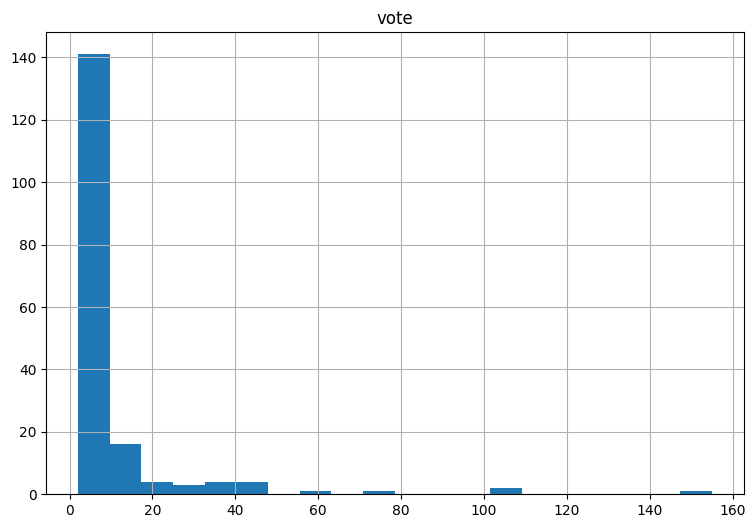

In [152]:
import matplotlib.pyplot as plt
df.hist(column='vote',
        figsize=(9,6),
        bins=20)

In [153]:
df=df[["vote","verified","reviewText"]]

In [154]:
df=df.dropna()
df = df.reset_index(drop=True)
df

,vote,verified,reviewText
0,3.0,True,The home button is so adorable! It doesn't loo...
1,2.0,True,This dock is amazing! I was a little apprehen...
2,2.0,True,I am a loyal T-Mobile customer for more than 4...
3,2.0,True,The system is definitely well built with plent...
4,5.0,True,I bought this Solar Portable Battery Pack with...
...,...,...,...
172,3.0,True,Cannot hear my watch anymore the case causes t...
173,3.0,False,This is a phone that is especially good if you...
174,2.0,False,I used this for a 96 Honda Prelude\n\nThe Good...
175,2.0,True,Another great product from uNu. Loving this c...


In [155]:
df = df[df['verified'] == True]

In [157]:
print(df)

     vote  verified                                         reviewText
0     3.0      True  The home button is so adorable! It doesn't loo...
1     2.0      True  This dock is amazing!  I was a little apprehen...
2     2.0      True  I am a loyal T-Mobile customer for more than 4...
3     2.0      True  The system is definitely well built with plent...
4     5.0      True  I bought this Solar Portable Battery Pack with...
..    ...       ...                                                ...
169   2.0      True  The product does not have near the capacity as...
171   2.0      True  This is a great phone. I'm not sure why they c...
172   3.0      True  Cannot hear my watch anymore the case causes t...
175   2.0      True  Another great product from uNu.  Loving this c...
176   3.0      True  Bought this case a few days ago on Amazon Prim...

[137 rows x 3 columns]


In [158]:
df["verified"].unique()

array([ True])

In [159]:
df=df[["vote","reviewText"]]

In [160]:
print(df)

     vote                                         reviewText
0     3.0  The home button is so adorable! It doesn't loo...
1     2.0  This dock is amazing!  I was a little apprehen...
2     2.0  I am a loyal T-Mobile customer for more than 4...
3     2.0  The system is definitely well built with plent...
4     5.0  I bought this Solar Portable Battery Pack with...
..    ...                                                ...
169   2.0  The product does not have near the capacity as...
171   2.0  This is a great phone. I'm not sure why they c...
172   3.0  Cannot hear my watch anymore the case causes t...
175   2.0  Another great product from uNu.  Loving this c...
176   3.0  Bought this case a few days ago on Amazon Prim...

[137 rows x 2 columns]


In [161]:
df["vote"].describe()

count    137.000000
mean       8.686131
std       14.569182
min        2.000000
25%        2.000000
50%        3.000000
75%        7.000000
max      105.000000
Name: vote, dtype: float64

In [162]:
df.loc[:, "vote"] = df["vote"].astype(int)

In [163]:
df=df[df["vote"]!=3]
df["label"]=np.where(df["vote"]>=4,1,0)

<ipython-input-163-acdb8e259ff9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["label"]=np.where(df["vote"]>=4,1,0)


In [164]:
print(df)

     vote                                         reviewText  label
1     2.0  This dock is amazing!  I was a little apprehen...      0
2     2.0  I am a loyal T-Mobile customer for more than 4...      0
3     2.0  The system is definitely well built with plent...      0
4     5.0  I bought this Solar Portable Battery Pack with...      1
5     4.0  I have had several headsets over the years inc...      1
..    ...                                                ...    ...
166   2.0  I held out for Christmas on this one and glad ...      0
168   2.0  The case is very well made and my Iphone 5 las...      0
169   2.0  The product does not have near the capacity as...      0
171   2.0  This is a great phone. I'm not sure why they c...      0
175   2.0  Another great product from uNu.  Loving this c...      0

[106 rows x 3 columns]


In [165]:
df["vote"].unique()

array([  2.,   5.,   4.,   6.,  12.,  42.,  13.,  15.,  63.,  45.,  10.,
         9.,  43.,  37.,  38.,   8.,  17.,  74.,   7.,  11.,  21., 105.,
        22.,  32.,  14.,  34.])

In [166]:
df["vote"].value_counts()

vote
2.0      42
4.0      15
6.0       6
5.0       5
9.0       4
7.0       4
10.0      4
15.0      3
11.0      2
8.0       2
43.0      2
37.0      2
13.0      2
45.0      1
63.0      1
38.0      1
17.0      1
74.0      1
42.0      1
12.0      1
21.0      1
105.0     1
22.0      1
32.0      1
14.0      1
34.0      1
Name: count, dtype: int64

In [167]:
df["reviewText"] = df["reviewText"].str.lower()

In [168]:
print(df)

     vote                                         reviewText  label
1     2.0  this dock is amazing!  i was a little apprehen...      0
2     2.0  i am a loyal t-mobile customer for more than 4...      0
3     2.0  the system is definitely well built with plent...      0
4     5.0  i bought this solar portable battery pack with...      1
5     4.0  i have had several headsets over the years inc...      1
..    ...                                                ...    ...
166   2.0  i held out for christmas on this one and glad ...      0
168   2.0  the case is very well made and my iphone 5 las...      0
169   2.0  the product does not have near the capacity as...      0
171   2.0  this is a great phone. i'm not sure why they c...      0
175   2.0  another great product from unu.  loving this c...      0

[106 rows x 3 columns]


In [169]:
df["reviewText"] = df["reviewText"].str.replace(r'[^a-zA-Z\s]', '')

In [170]:
print(df)

     vote                                         reviewText  label
1     2.0  this dock is amazing!  i was a little apprehen...      0
2     2.0  i am a loyal t-mobile customer for more than 4...      0
3     2.0  the system is definitely well built with plent...      0
4     5.0  i bought this solar portable battery pack with...      1
5     4.0  i have had several headsets over the years inc...      1
..    ...                                                ...    ...
166   2.0  i held out for christmas on this one and glad ...      0
168   2.0  the case is very well made and my iphone 5 las...      0
169   2.0  the product does not have near the capacity as...      0
171   2.0  this is a great phone. i'm not sure why they c...      0
175   2.0  another great product from unu.  loving this c...      0

[106 rows x 3 columns]


In [171]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [172]:
stop_words = set(stopwords.words('english'))

In [173]:
def remove_stopwords(text):
    tokens = nltk.word_tokenize(text)
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]
    return ' '.join(filtered_tokens)


In [174]:
df["reviewText"] = df["reviewText"].apply(remove_stopwords)

In [175]:
print(df)

     vote                                         reviewText  label
1     2.0  dock amazing ! little apprehensive spending mu...      0
2     2.0  loyal t-mobile customer 4 years purchased kits...      0
3     2.0  system definitely well built plenty metal part...      0
4     5.0  bought solar portable battery pack flashlight ...      1
5     4.0  several headsets years including motorola , ja...      1
..    ...                                                ...    ...
166   2.0  held christmas one glad ! favorite gift far ! ...      0
168   2.0  case well made iphone 5 lasts days instead les...      0
169   2.0   product near capacity advertised . buy product .      0
171   2.0  great phone . 'm sure call mid range phone spe...      0
175   2.0  another great product unu . loving case alot o...      0

[106 rows x 3 columns]


In [176]:
df["label"].describe()

count    106.000000
mean       0.603774
std        0.491436
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: label, dtype: float64

array([[<Axes: title={'center': 'label'}>]], dtype=object)

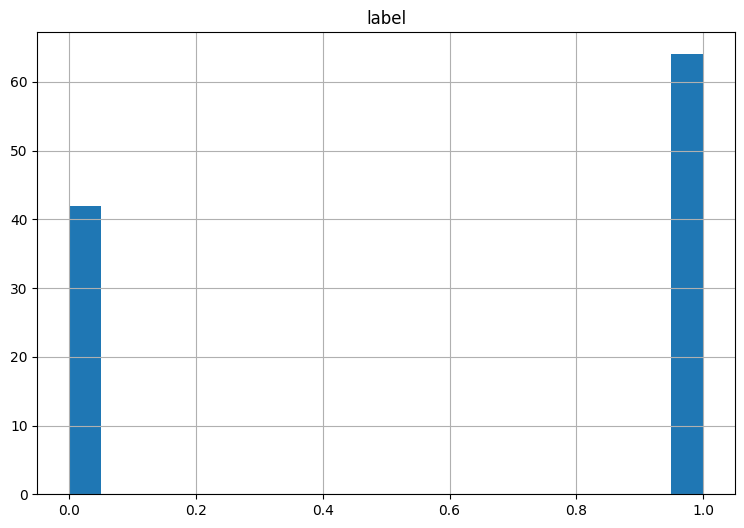

In [177]:
import matplotlib.pyplot as plt
df.hist(column='label',
        figsize=(9,6),
        bins=20)

In [178]:
import seaborn as sns

In [179]:
df = df[["reviewText", "label"]]

In [180]:
print(df)

                                            reviewText  label
1    dock amazing ! little apprehensive spending mu...      0
2    loyal t-mobile customer 4 years purchased kits...      0
3    system definitely well built plenty metal part...      0
4    bought solar portable battery pack flashlight ...      1
5    several headsets years including motorola , ja...      1
..                                                 ...    ...
166  held christmas one glad ! favorite gift far ! ...      0
168  case well made iphone 5 lasts days instead les...      0
169   product near capacity advertised . buy product .      0
171  great phone . 'm sure call mid range phone spe...      0
175  another great product unu . loving case alot o...      0

[106 rows x 2 columns]


In [181]:
df.to_csv('output_reviews.csv', index=False)

In [182]:
df_data = pd.read_csv('output_reviews.csv')

In [183]:
df_data = df_data.sample(frac=1)

In [184]:
df_data.head()

,reviewText,label
43,"impressed noise cancelling . fit decent , coul...",1
71,decent tpu case money . fit finish seem nice ....,1
91,nice wire . today 's smartphone popularity see...,0
56,second screen protector 've far pre product fa...,1
30,glad got wife daughters always dropping phones...,0


In [185]:
df_data.describe()

,label
count,106.000000
mean,0.603774
std,0.491436
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [186]:
df_data.shape

(106, 2)

In [187]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 106 entries, 43 to 97
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reviewText  106 non-null    object
 1   label       106 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.5+ KB


In [188]:
for col in df_data.columns:
    print("Number of unique values in feature '{}': {}".format(col, df_data[col].nunique()))


Number of unique values in feature 'reviewText': 106
Number of unique values in feature 'label': 2


In [189]:
df_data['word_counts'] = df_data["reviewText"].apply(lambda x: len(str(x).split()))


In [190]:
df_data.head()

,reviewText,label,word_counts
43,"impressed noise cancelling . fit decent , coul...",1,70
71,decent tpu case money . fit finish seem nice ....,1,61
91,nice wire . today 's smartphone popularity see...,0,30
56,second screen protector 've far pre product fa...,1,116
30,glad got wife daughters always dropping phones...,0,10


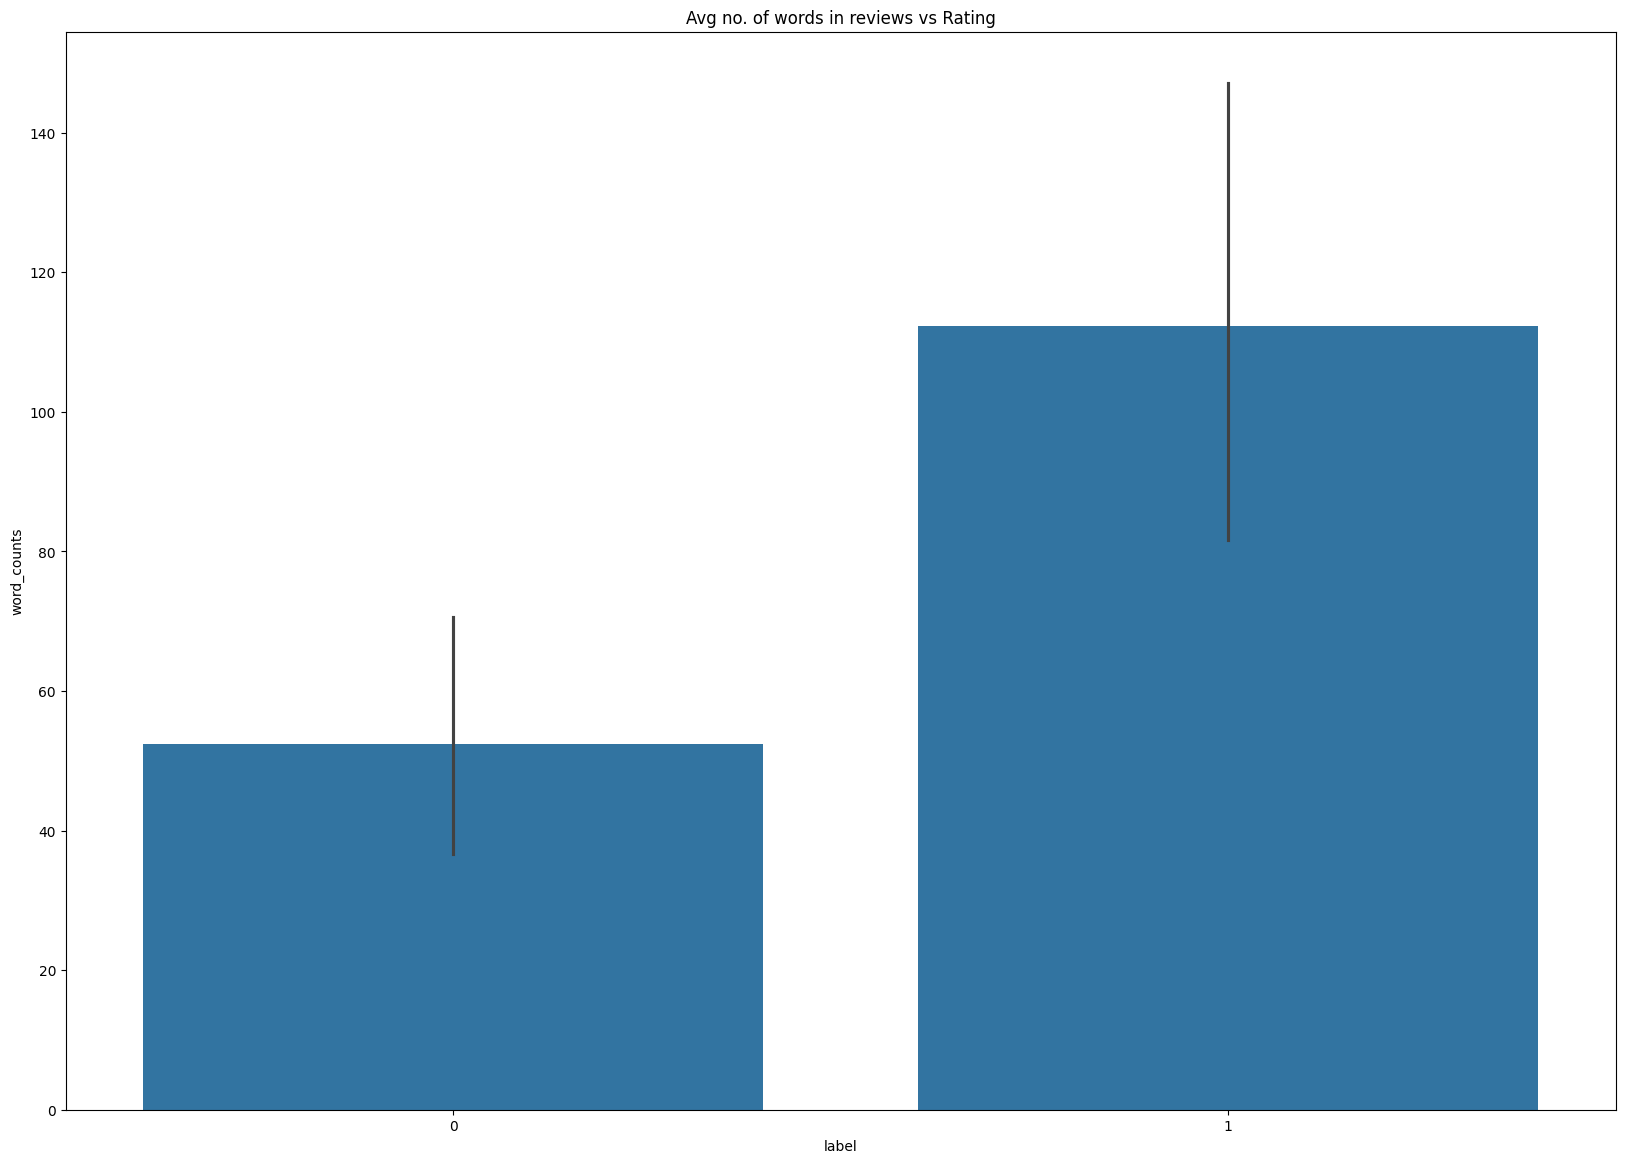

In [191]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 14))
sns.barplot(x='label', y='word_counts', data=df_data)
plt.title('Avg no. of words in reviews vs Rating')
plt.show()


In [192]:
# from the above plot we can see the the average of words in positive reviews are higher than the one in negative ones.
print(df_data.isna().sum())

reviewText     0
label          0
word_counts    0
dtype: int64


In [193]:
#spliting the data into the train and test data
from sklearn.model_selection import train_test_split
train, test=train_test_split(df_data, test_size=0.3)

In [194]:
print(train.shape)

(74, 3)


In [195]:
print(test.shape)

(32, 3)


In [196]:
import nltk
nltk.download('wordnet')



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [197]:
t=train['reviewText']


In [198]:
def text_prepocessing(text):
    # Your preprocessing code here
    processed_text = text.lower()  # Example preprocessing: converting text to lowercase
    return processed_text

In [199]:
t=train['reviewText']

In [200]:
train.head()

,reviewText,label,word_counts
76,"best case , absolutely satisfied purchase , wa...",1,19
72,quite pictured . one metal badge front says ``...,1,62
79,battery great accessory anyone looking double ...,1,218
10,n't need reflective film reflects windshield ....,1,94
104,great phone . 'm sure call mid range phone spe...,0,20


In [201]:
test.head()

,reviewText,label,word_counts
36,great phone - could n't tell refurbished looke...,0,24
28,ordered case expecting screen protector suck l...,1,39
96,people talking . product crap . bubble free as...,1,52
13,n't let title turn . armor suit shield great q...,1,70
42,"omg ! phone n't make re-think paying $ 500 , $...",1,88


In [202]:
y_train=train['label']

In [98]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

def text_processing(text):
    # Tokenization
    tokens = word_tokenize(text)

    # Removing punctuation
    tokens = [word for word in tokens if word not in string.punctuation]

    # Removing stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    processed_text = ' '.join(tokens)

    return processed_text

# Example usage:
review = "This is a sample review text, containing some punctuations and stopwords."
processed_review = text_processing(review)
print(processed_review)


This sample review text containing punctuation stopwords


In [203]:
train.head()

,reviewText,label,word_counts
76,"best case , absolutely satisfied purchase , wa...",1,19
72,quite pictured . one metal badge front says ``...,1,62
79,battery great accessory anyone looking double ...,1,218
10,n't need reflective film reflects windshield ....,1,94
104,great phone . 'm sure call mid range phone spe...,0,20


In [204]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

In [205]:
tfidf = TfidfVectorizer(stop_words='english', max_features=1000)

In [206]:
tfidf_matrix = tfidf.fit_transform(df['reviewText'])

In [207]:
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())
result_df = pd.concat([df, tfidf_df], axis=1)

In [208]:
print(result_df)


                                            reviewText  label   10       100  \
1    dock amazing ! little apprehensive spending mu...    0.0  0.0  0.000000   
2    loyal t-mobile customer 4 years purchased kits...    0.0  0.0  0.000000   
3    system definitely well built plenty metal part...    0.0  0.0  0.000000   
4    bought solar portable battery pack flashlight ...    1.0  0.0  0.000000   
5    several headsets years including motorola , ja...    1.0  0.0  0.000000   
..                                                 ...    ...  ...       ...   
99                                                 NaN    NaN  0.0  0.000000   
100                                                NaN    NaN  0.0  0.000000   
103                                                NaN    NaN  0.0  0.000000   
104                                                NaN    NaN  0.0  0.000000   
105                                                NaN    NaN  0.0  0.085838   

           15   19   1a   20  2015   2a

In [209]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [210]:
X = result_df.drop('label', axis=1)  # Assuming 'target_column_name' is the name of your target column
y = result_df['label']

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [212]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Assuming df is your DataFrame with 'reviewText' and 'label' columns
X = df['reviewText']
y = df['label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text to numerical features using TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Fit SVM model
svm = SVC()
svm.fit(X_train_tfidf, y_train)


SVC()

In [213]:
# Assuming X_test is your test set of text data
X_test_tfidf = tfidf.transform(X_test)

# Make predictions
y_pred = svm.predict(X_test_tfidf)


In [214]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6363636363636364


In [215]:
print("SVM Model Parameters:")
print(svm.get_params())

SVM Model Parameters:
{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [216]:
print("\nAccuracy:", accuracy)


Accuracy: 0.6363636363636364


In [217]:
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.64      1.00      0.78        14

    accuracy                           0.64        22
   macro avg       0.32      0.50      0.39        22
weighted avg       0.40      0.64      0.49        22



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [218]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import time

# Assuming df is your DataFrame with 'reviewText' and 'label' columns
X = df['reviewText']
y = df['label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text to numerical features using TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Start the timer
start_time = time.time()

# Fit SVM model
svm = SVC()
svm.fit(X_train_tfidf, y_train)

# End the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time
print("Elapsed Time (seconds):", elapsed_time)


Elapsed Time (seconds): 0.010059833526611328


In [224]:
n = 1000  # Total number of data points
n_sv = 0.2 * n

# Assume the time complexity of the kernel computation is O(n_sv^2) or O(n_sv^3)
time_per_kernel_computation = running_time / (n_sv**2)

total_kernel_computations = n_sv * (n_sv - 1) / 2  # Assuming only unique kernel computations are performed

total_kernel_time = total_kernel_computations * time_per_kernel_computation

print("Estimated number of support vectors:", n_sv)
print("Estimated total kernel time:", total_kernel_time)


Estimated number of support vectors: 200.0
Estimated total kernel time: 0.0015327203273773193


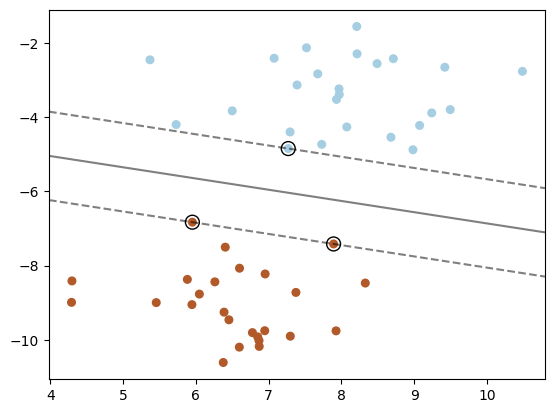

In [221]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn import svm

# Generate some data
X, y = datasets.make_blobs(n_samples=50, centers=2, random_state=6)

# Fit the SVM model
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# Plot the decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

plt.show()


In [222]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train_tfidf, y_train)
predictions = clf.predict(X_test_tfidf)
print(predictions)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


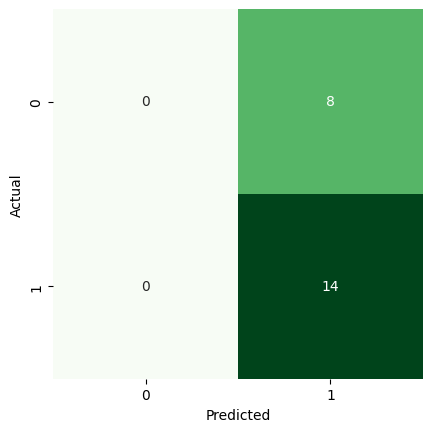

In [223]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming predictions and y_test are already defined
cm = confusion_matrix(y_test, predictions)

# Plotting the confusion matrix
sns.heatmap(cm, square=True, annot=True, cmap="Greens", fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
